In [1]:
from sklearn.metrics import accuracy_score,precision_score

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
scaler=MinMaxScaler()
encoder=LabelEncoder()

In [6]:
df_test=pd.read_csv('/home/amal/NoteBook/Dataset/loan_sanction_test.csv')
df_train=pd.read_csv('/home/amal/NoteBook/Dataset/loan_sanction_train.csv')
frame=[df_test,df_train]
data=pd.concat(frame)
data = data.drop(['Loan_ID'], axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [7]:
# calculate the percentage of missing values for each column
missing_values_percent = data.isnull().sum() / len(data) * 100
print(missing_values_percent)

# create a list of columns to drop
columns_to_drop = missing_values_percent[missing_values_percent > 50].index.tolist()

# drop the columns with more than 50% missing values
data = data.drop(columns_to_drop, axis=1)

# fill the remaining missing values
for column in data.columns:
    if data[column].dtype == 'object':
        # fill missing values with the mode of the column
        data[column] = data[column].fillna(data[column].mode()[0])
    elif data[column].dtype in ['int64', 'float64']:
        # fill missing values with the mean of the column
        data[column] = data[column].fillna(data[column].mean())
data

Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.00000,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.00000,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.00000,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.83592,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.00000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.00000,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.00000,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.00000,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.00000,Urban,Y


In [8]:
data = pd.get_dummies(data, columns=['Gender' ,'Married' ,'Dependents' ,'Education' ,'Property_Area','Self_Employed'])
data['Loan_Status']=encoder.fit_transform(data['Loan_Status'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    int64  
 1   CoapplicantIncome        981 non-null    float64
 2   LoanAmount               981 non-null    float64
 3   Loan_Amount_Term         981 non-null    float64
 4   Credit_History           981 non-null    float64
 5   Loan_Status              981 non-null    int64  
 6   Gender_Female            981 non-null    uint8  
 7   Gender_Male              981 non-null    uint8  
 8   Married_No               981 non-null    uint8  
 9   Married_Yes              981 non-null    uint8  
 10  Dependents_0             981 non-null    uint8  
 11  Dependents_1             981 non-null    uint8  
 12  Dependents_2             981 non-null    uint8  
 13  Dependents_3+            981 non-null    uint8  
 14  Education_Graduate       9

In [10]:
Scaled_df=scaler.fit_transform(data)
Scaled_df = pd.DataFrame(Scaled_df, columns = data.columns)

In [70]:
Scaled_df.to_csv('Scaled_df.csv',index=False)

Scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    float64
 1   CoapplicantIncome        981 non-null    float64
 2   LoanAmount               981 non-null    float64
 3   Loan_Amount_Term         981 non-null    float64
 4   Credit_History           981 non-null    float64
 5   Loan_Status              981 non-null    float64
 6   Gender_Female            981 non-null    float64
 7   Gender_Male              981 non-null    float64
 8   Married_No               981 non-null    float64
 9   Married_Yes              981 non-null    float64
 10  Dependents_0             981 non-null    float64
 11  Dependents_1             981 non-null    float64
 12  Dependents_2             981 non-null    float64
 13  Dependents_3+            981 non-null    float64
 14  Education_Graduate       9

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Scaled_df.drop(columns='Loan_Status'), Scaled_df['Loan_Status'], test_size=0.2, random_state=42)

In [13]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
975,0.039901,0.046800,0.143271,0.746835,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
625,0.181272,0.050400,0.426918,0.746835,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
931,0.108630,0.000000,0.360347,0.746835,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
33,0.034358,0.064991,0.215630,0.746835,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31,0.077160,0.019680,0.264834,0.746835,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.019704,0.042240,0.159190,0.746835,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
270,0.020185,0.058656,0.130246,0.746835,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
860,0.213123,0.000000,0.312590,0.746835,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
435,0.087654,0.000000,0.167873,0.113924,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [14]:
print("xtest",len(X_test))
print("xtrain",len(X_train))

xtest 197
xtrain 784


In [15]:
# from sklearn import svm
# svmModel = svm.SVC(C=100, gamma=0.01, probability=True, random_state=42, verbose=True)
# svmModel.fit(X_train,y_train)

In [16]:
# from sklearn.model_selection import GridSearchCV
  

# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(svmModel, param_grid, refit = True, verbose = 3)
  

# grid.fit(X_train, y_train)

In [17]:

# print(grid.best_params_)
  
# print(grid.best_estimator_)

In [18]:
# predsvm=svmModel.predict(X_test)
# accuracy_score(y_test,predsvm)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, fit_intercept=False, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [20]:
lr.fit(X_train,y_train)

LogisticRegression(C=10, fit_intercept=False)

In [21]:
pred=lr.predict(X_test)

In [22]:
accuracy_score(y_test,pred)

0.7918781725888325

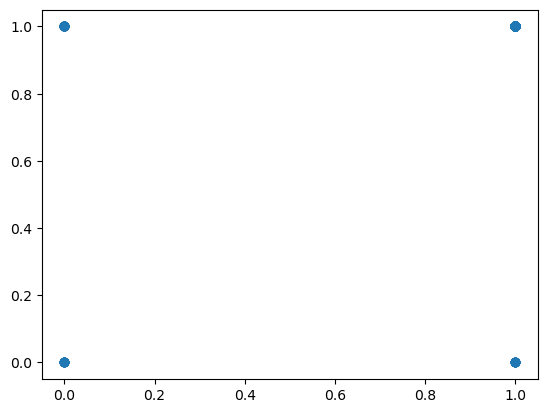

In [23]:
plt.scatter(x=y_test,y=pred)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

         0.0       0.50      0.24      0.33        41
         1.0       0.82      0.94      0.88       156

    accuracy                           0.79       197
   macro avg       0.66      0.59      0.60       197
weighted avg       0.76      0.79      0.76       197



In [25]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import LinearSVC

# lr = LogisticRegression(C=10, fit_intercept=False,penalty='l2')
# scores = cross_val_score(lr, Scaled_df.drop(columns='Loan_Status'), Scaled_df['Loan_Status'], cv=5)
# print(scores)


In [26]:
# X=Scaled_df.drop(columns='Loan_Status')
# y=Scaled_df['Loan_Status']
# scores = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
# scores

t's important to notice that the accuracy may not be the best metric to evaluate this model's performance, since the dataset may be imbalanced, and the accuracy can be misleading. In such cases, it's a good idea to use other evaluation metrics such as precision, recall, f1-score, or AUC-ROC, to get a better understanding of the model's performance.

It's also worth noting that cross-validation provides an estimate of the model's generalization performance, but still, it's a good idea to evaluate the model on a hold-out test set to get a more robust estimate of its performance.

In [27]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# y_pred_proba = lr.predict_proba(X_test)[::,1]
# fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# plt.plot(fpr,tpr,label="AUC="+str(roc_auc_score(y_test, y_pred_proba)))
# plt.legend(loc=4)
# plt.show()


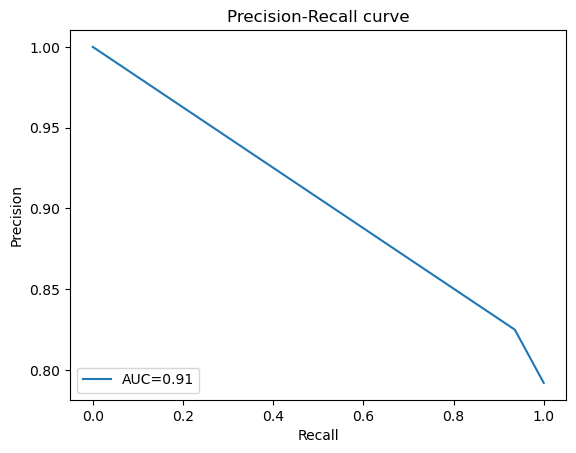

In [28]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, pred)

plt.plot(recall, precision, label='AUC={0:0.2f}'.format(auc(recall, precision)))
plt.legend(loc='lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


# DEEP LEARNING


Creating a deep learning model to train the data can be a good option to try and improve the accuracy of the predictions. Deep learning models, specifically neural networks, have been known to achieve high accuracy on a wide range of tasks.

One way to create a deep learning model for this dataset is to use a library such as Keras or TensorFlow to build a neural network with multiple layers. The input layer will have the same number of neurons as the number of features in the dataset and the output layer will have a single neuron with a sigmoid activation function to predict the probability of a loan application being approved or not.

In the hidden layers, you can use different types of layers like Dense, Dropout, or BatchNormalization. The number of neurons in the hidden layers, the activation functions used, and the number of layers can all be adjusted to optimize the performance of the model.

It is also important to keep in mind that creating a deep learning model involves a lot of experimentation and trial-and-error. It may take some time to find the best architecture and hyperparameters for the model to achieve the highest accuracy.

You can use techniques like early stopping and k-fold cross-validation to prevent overfitting and to get a better estimate of the model's performance on unseen data.

It's worth noting that deep learning models are computationally intensive and require a lot of data to train. So, it is important to have a large and diverse dataset with enough data to train and validate the model.

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

2023-01-27 10:06:38.068456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 10:06:38.318604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-27 10:06:38.318634: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 10:06:39.196313: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Scaled_df.drop(columns='Loan_Status'), Scaled_df['Loan_Status'], test_size=0.2, random_state=42)

In [31]:
# # Define the deep learning model
# model = Sequential()
# model.add(Dense(32, input_dim=20, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [32]:
# Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Train the model
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [34]:
# Import additional libraries
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-01-27 10:06:40.394679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-27 10:06:40.394734: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-27 10:06:40.394791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amal-HP-Laptop-15-da0xxx): /proc/driver/nvidia/version does not exist
2023-01-27 10:06:40.395202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
best_model = ModelCheckpoint('model.h5', save_best_only=True)

In [38]:
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, best_model])

Epoch 1/25
25/25 [==============================] - 2s 17ms/step - loss: 0.5773 - accuracy: 0.7487 - val_loss: 0.5959 - val_accuracy: 0.7868
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5441 - accuracy: 0.7793 - val_loss: 0.5916 - val_accuracy: 0.7919
Epoch 3/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.7959 - val_loss: 0.5747 - val_accuracy: 0.7919
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.5287 - accuracy: 0.7997 - val_loss: 0.5598 - val_accuracy: 0.7919
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5069 - accuracy: 0.8023 - val_loss: 0.5463 - val_accuracy: 0.7919
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5111 - accuracy: 0.8087 - val_loss: 0.5417 - val_accuracy: 0.7919
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.4950 - accuracy: 0.8061 - val_loss: 0.5347 - val_accuracy: 0.7919
Epoch 8/25
25/25 [=

In [43]:
predictions = model.predict(X_test)

# The predictions will be in the form of a probability for each sample. 
# If you want the class labels, you can use the following code:

predicted_classes = predictions > 0.5
predicted_classes = predicted_classes.astype(int)

7/7 [==============================] - 0s 2ms/step


pred [[1]]
actual 789    1.0
Name: Loan_Status, dtype: float64


In [65]:
for i in range(1, 11):
    print(f'Prediction {i}: {predicted_classes[i-1]}')
    print(f'Actual {i}: {y_test[i-1]}')

Prediction 1: [1]


KeyError: 0

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 975 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          784 non-null    float64
 1   CoapplicantIncome        784 non-null    float64
 2   LoanAmount               784 non-null    float64
 3   Loan_Amount_Term         784 non-null    float64
 4   Credit_History           784 non-null    float64
 5   Gender_Female            784 non-null    float64
 6   Gender_Male              784 non-null    float64
 7   Married_No               784 non-null    float64
 8   Married_Yes              784 non-null    float64
 9   Dependents_0             784 non-null    float64
 10  Dependents_1             784 non-null    float64
 11  Dependents_2             784 non-null    float64
 12  Dependents_3+            784 non-null    float64
 13  Education_Graduate       784 non-null    float64
 14  Education_Not Graduate  

In [67]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 784 entries, 975 to 102
Series name: Loan_Status
Non-Null Count  Dtype  
--------------  -----  
784 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [68]:
import tensorflow as tf
from tensorflow import keras

# Create the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(20,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.5475 - accuracy: 0.7990 - val_loss: 0.4752 - val_accuracy: 0.8025
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.8086 - val_loss: 0.4694 - val_accuracy: 0.8025
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4662 - accuracy: 0.8086 - val_loss: 0.4604 - val_accuracy: 0.8025
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.8086 - val_loss: 0.4527 - val_accuracy: 0.8025
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8086 - val_loss: 0.4455 - val_accuracy: 0.8025
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.8086 - val_loss: 0.4381 - val_accuracy: 0.8025
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8086 - val_loss: 0.4296 - val_accuracy: 0.8025
Epoch 8/50
20/20 [=